# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data and analyze types

In [24]:
img_dir = '/kaggle/input/data-ham10000/Images_all'
metadata_file ='/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'
df = pd.read_csv(metadata_file)
df.head(10)

lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back

In [25]:
df.describe()

age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

In [26]:
df.info()
print('\nUnique Lesion IDs -', len(df['lesion_id'].unique()))
print('Unique Image IDs -', len(df['image_id'].unique()))
print('Unique dx -', len(df['dx'].unique()))
print('Unique dx types -', len(df['dx_type'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB

Unique Lesion IDs - 7470
Unique Image IDs - 10015
Unique dx - 7
Unique dx types - 4


# Age distribution

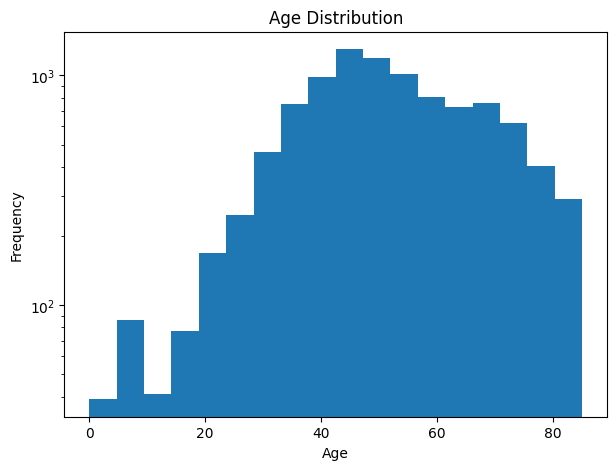

In [27]:
plt.figure(figsize = (7,5))
plt.hist(df['age'], bins = 18)
plt.yscale("log")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Sex distribution

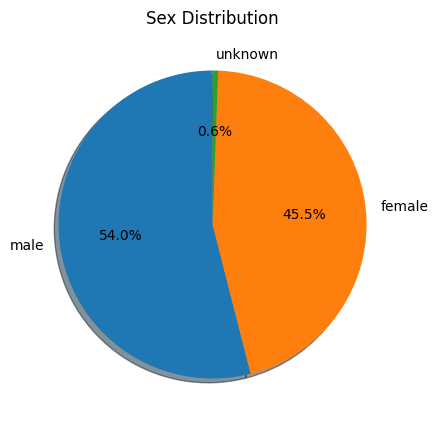

In [28]:
col_count = df['sex'].value_counts()
label = []
freq = []
for key, value in col_count.items():
    label.append(key)
    freq.append(value)

plt.figure(figsize = (7,5))
plt.pie(freq, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sex Distribution')
plt.show()

# Disease distribution

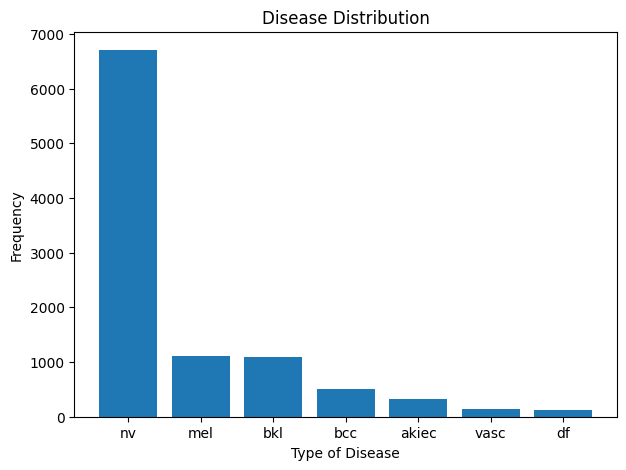

In [29]:
col_count = df['dx'].value_counts()
label = []
freq = []

for key, value in col_count.items():
    label.append(key)
    freq.append(value)

plt.figure(figsize = (7,5))
plt.bar(label, freq)
plt.xlabel('Type of Disease')
plt.ylabel('Frequency')
plt.title('Disease Distribution')
plt.show()

# Record references

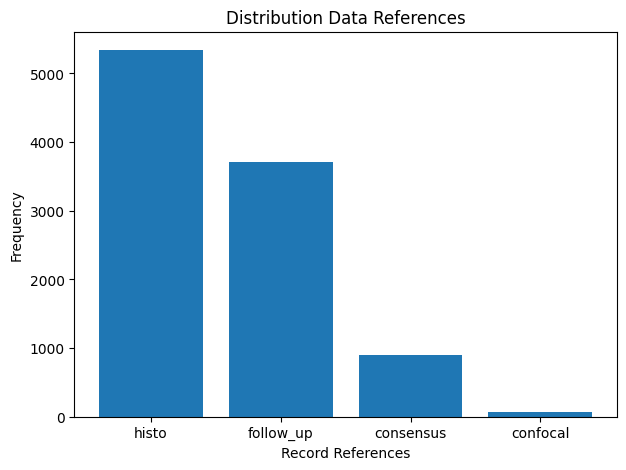

In [30]:
col_count = df['dx_type'].value_counts()
label = []
freq = []

for key, value in col_count.items():
    label.append(key)
    freq.append(value)

plt.figure(figsize = (7,5))
plt.bar(label, freq)
plt.xlabel('Record References')
plt.ylabel('Frequency')
plt.title('Distribution Data References')
plt.show()

# Localization distribution

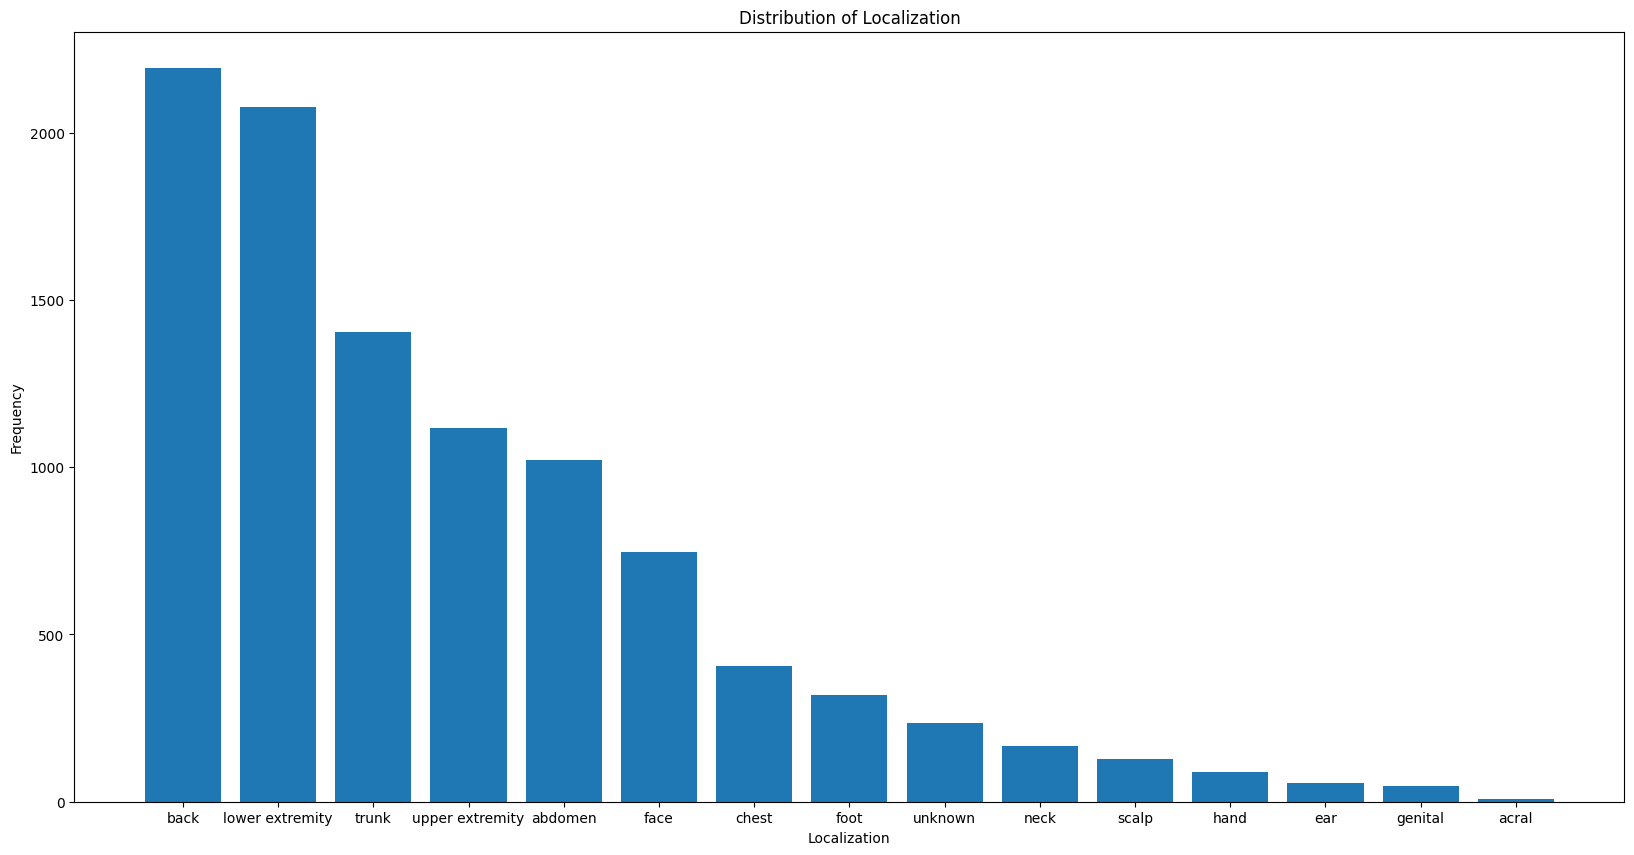

In [31]:
col_count = df['localization'].value_counts()
label = []
freq = []

for key, value in col_count.items():
    label.append(key)
    freq.append(value)

plt.figure(figsize = (20,10))
plt.bar(label, freq)
plt.xlabel('Localization')
plt.ylabel('Frequency')
plt.title('Distribution of Localization')
plt.show()

# Distribution of location and age

# Displaying Random Images

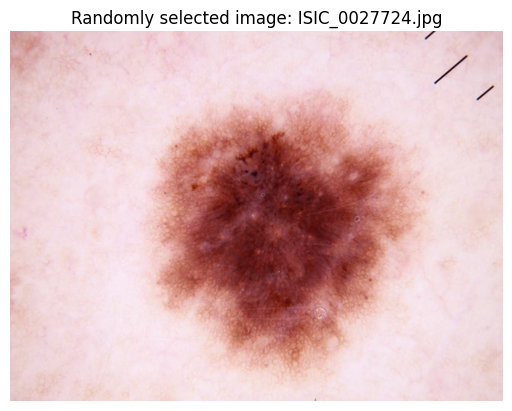

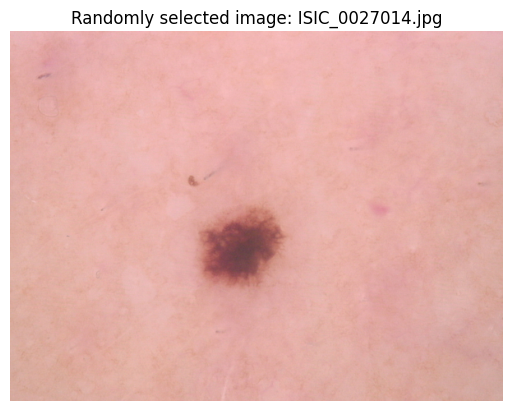

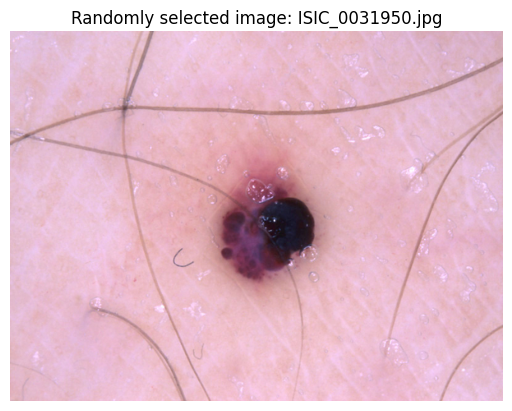

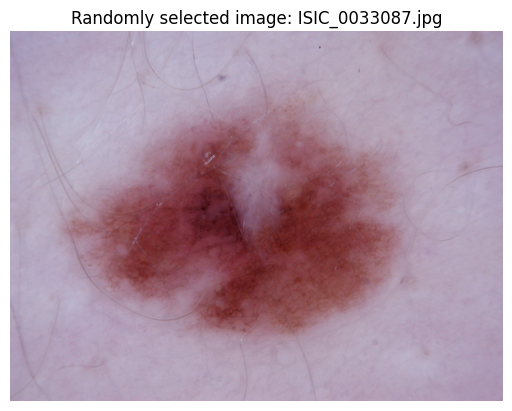

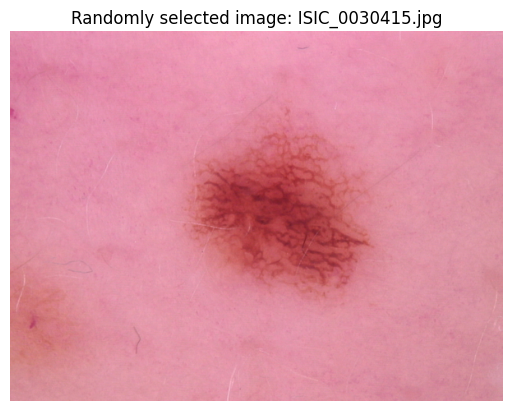

In [36]:
import os
import random

from PIL import Image

def display_random_image(folder_path):
    """
    Display a random image from the specified folder.

    Args:
    folder_path (str): The path to the folder containing the images.
    """
    # List all files in the given folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    
    # Choose a random image file
    random_image_file = random.choice(image_files)
    
    # Load the image
    image_path = os.path.join(folder_path, random_image_file)
    image = Image.open(image_path)
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f"Randomly selected image: {random_image_file}")
    plt.show()

display_random_image('/kaggle/input/data-ham10000/Images_all')
display_random_image('/kaggle/input/data-ham10000/Images_all')
display_random_image('/kaggle/input/data-ham10000/Images_all')
display_random_image('/kaggle/input/data-ham10000/Images_all')
display_random_image('/kaggle/input/data-ham10000/Images_all')

# Statistical analysis

In [39]:
def load_images(image_dir, num_images=1000):
    """
    Load a specified number of images from a directory.
    """
    files = os.listdir(image_dir)
    images = []
    for file in files[:num_images]:  # Limit the number of images to keep memory usage reasonable
        image_path = os.path.join(image_dir, file)
        image = Image.open(image_path)
        images.append(image)
    return images

def analyze_color_distribution(images):
    """
    Analyze the color distribution of the provided images.
    """
    color_data = {'red': [], 'green': [], 'blue': []}
    for image in images:
        # Convert image to RGB just in case it's not
        image = image.convert('RGB')
        # Split into channels and calculate histograms
        for i, color in enumerate(['red', 'green', 'blue']):
            channel_data = np.array(image)[:, :, i]
            histogram, _ = np.histogram(channel_data, bins=256, range=(0, 256))
            color_data[color].append(histogram)
    
    # Average histograms across all images
    avg_histograms = {color: np.mean(np.stack(color_data[color]), axis=0) for color in color_data}
    
    # Plotting the histograms
    plt.figure(figsize=(10, 5))
    for color, hist in avg_histograms.items():
        plt.plot(hist, color=color)
    plt.title('Average Color Histograms')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(['Red', 'Green', 'Blue'])
    plt.grid(True)
    plt.show()

def compute_statistical_analysis(images):
    """
    Compute statistical analysis on pixel intensities.
    """
    stats = {'mean': [], 'median': [], 'std': []}
    for image in images:
        image_data = np.array(image)
        stats['mean'].append(np.mean(image_data))
        stats['median'].append(np.median(image_data))
        stats['std'].append(np.std(image_data))
    
    # Print overall statistics
    for key in stats:
        overall_stat = np.mean(stats[key])
        print(f'Overall {key}: {overall_stat:.2f}')

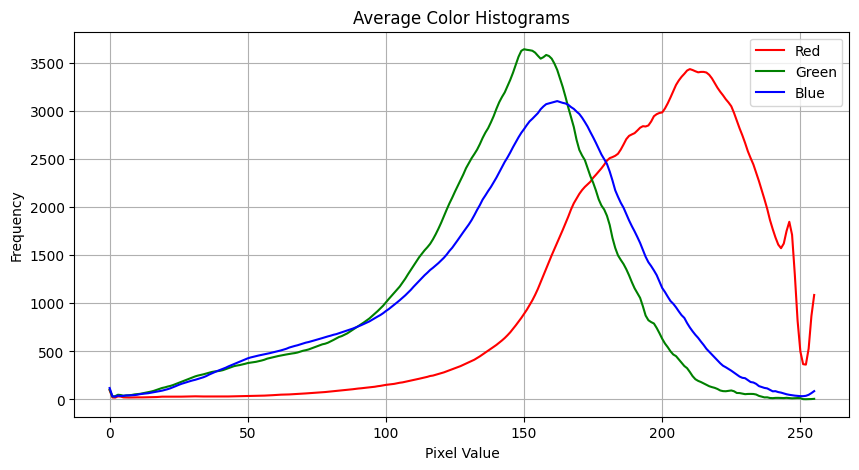

Overall mean: 160.32
Overall median: 161.32
Overall std: 40.97


In [41]:
images = load_images(img_dir, num_images=1000)  # Adjust num_images based on your memory capacity
analyze_color_distribution(images)
compute_statistical_analysis(images)

# Edge detection

In [53]:
import cv2
from skimage.feature import local_binary_pattern

In [48]:
def edge_detection(image, sigma=0.33):
    """
    Perform Canny edge detection.
    Args:
        image: A PIL image.
        sigma: The standard deviation of the Gaussian filter.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # Compute the median of the single channel pixel intensities
    v = np.median(gray)
    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(gray, lower, upper)
    return edged

def texture_analysis(image, radius=3, n_points=24):
    """
    Perform texture analysis using Local Binary Pattern.
    Args:
        image: A PIL image.
        radius: The radius of the LBP.
        n_points: Number of points to consider for LBP.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # Compute the LBP image
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

def display_images(images, titles, cmap=None):
    """
    Display a list of images with titles.
    """
    plt.figure(figsize=(12, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

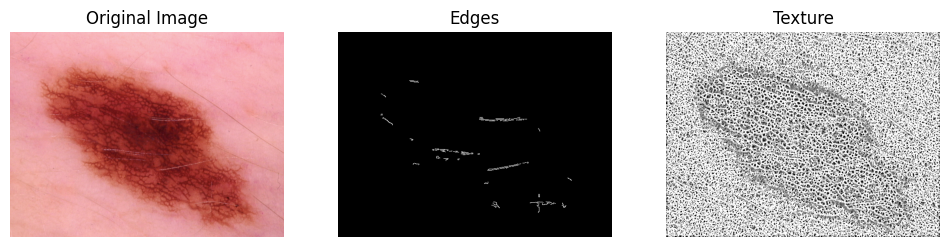

In [54]:
image_path = '/kaggle/input/data-ham10000/Images_all/ISIC_0024308.jpg'  # Update with actual path and file
original_image = Image.open(image_path)

# Edge Detection
edges = edge_detection(original_image)

# Texture Analysis
texture = texture_analysis(original_image)

# Display the results
display_images([original_image, edges, texture], ['Original Image', 'Edges', 'Texture'], cmap='gray')

# Augmentation analysis

In [61]:
from PIL import Image, ImageEnhance, ImageOps

In [64]:
def random_augmentation(image):
    """
    Apply random transformations to an image to perform data augmentation.
    """
    # Random rotation between -25 to 25 degrees
    image = image.rotate(random.uniform(-150, 25))
    
    # Random flip
    if random.random() > 0.5:
        image = ImageOps.mirror(image)
    
    # Random color enhancement
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))
    
    return image

def load_and_augment_images(image_dir, num_images=20):
    """
    Load images from a directory, apply augmentation, and display them.
    """
    files = os.listdir(image_dir)
    selected_files = random.sample(files, num_images)
    
    plt.figure(figsize=(20, 10))
    
    for i, file_name in enumerate(selected_files):
        # Load image
        img_path = os.path.join(image_dir, file_name)
        image = Image.open(img_path)
        
        # Apply augmentation
        aug_image = random_augmentation(image)
        
        # Display images
        plt.subplot(4, 5, i + 1)  # Adjust grid size based on num_images
        plt.imshow(aug_image)
        plt.title(f"Augmented Image {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

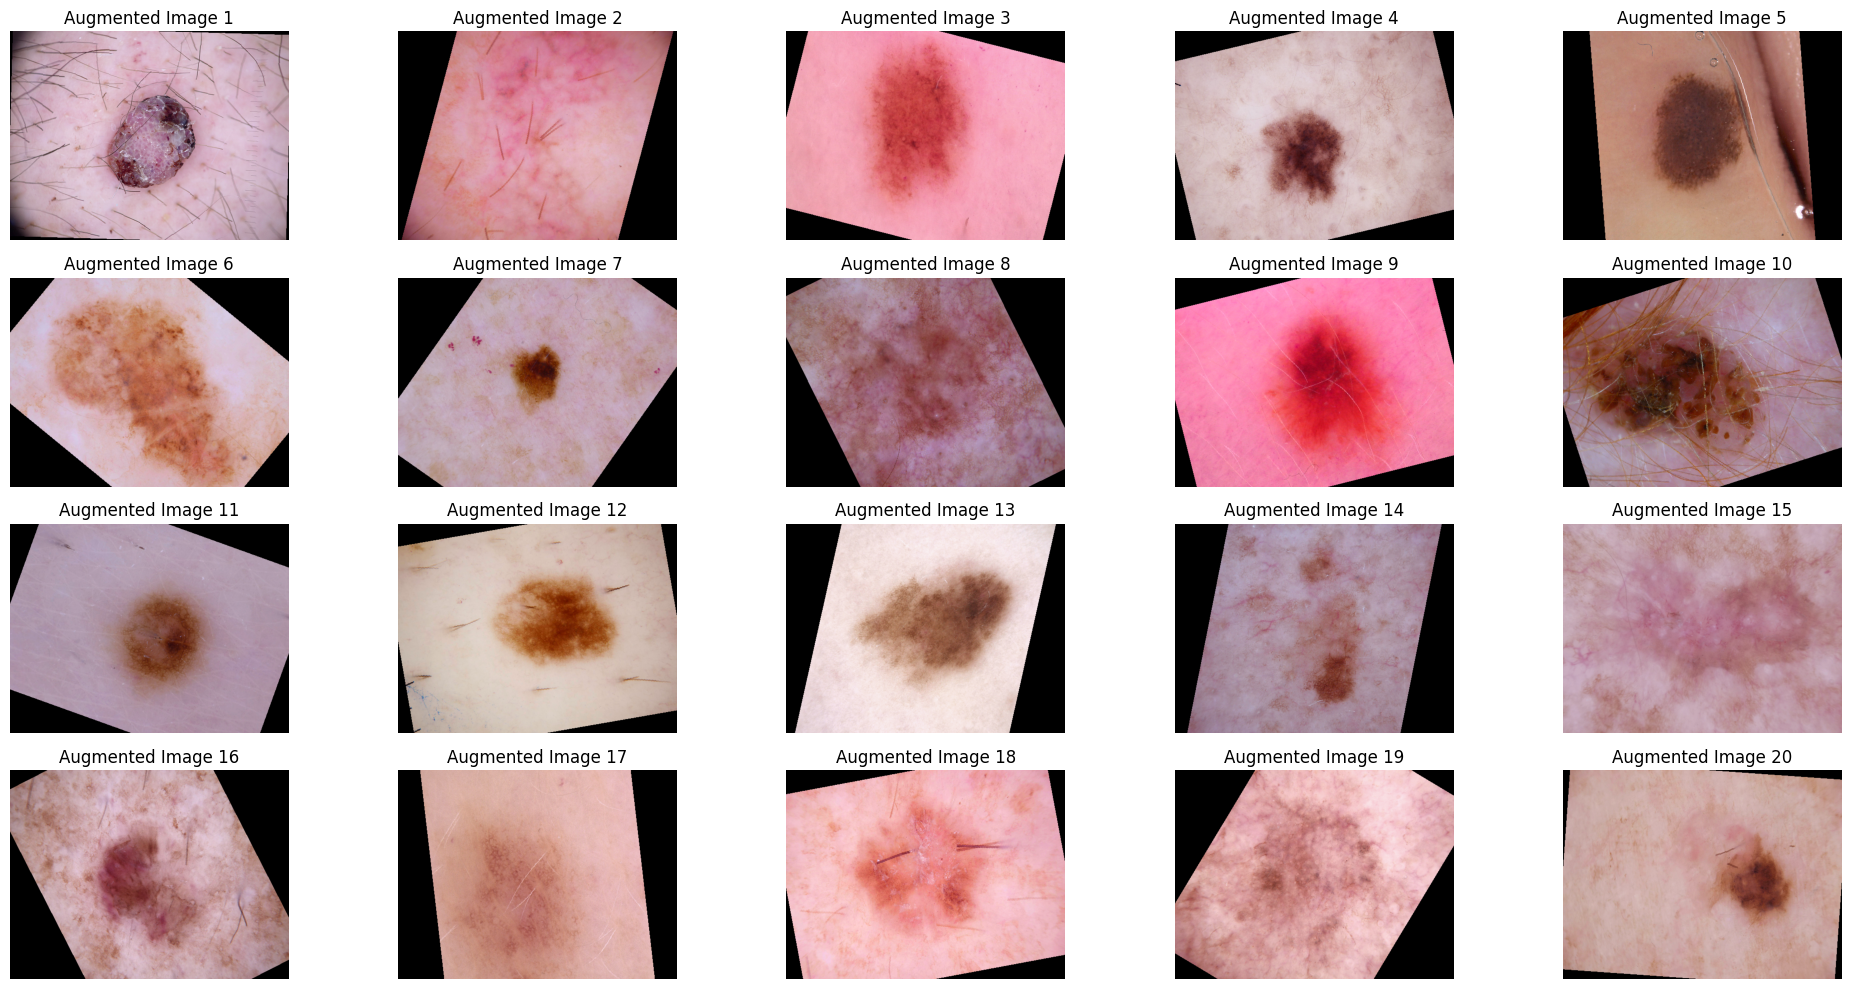

In [65]:
load_and_augment_images(img_dir)